# Dataset sul Traffico di Rete

Il dataset che useremo in questa esercitazione contiene caratteristiche estratte da sessioni di traffico di rete, progettate per l'analisi e il rilevamento di malware basato sul comportamento della rete. Le caratteristiche sono organizzate in diverse categorie funzionali.

## Categorie principali di caratteristiche

### Informazioni sulla sessione
- **Informazioni temporali**: `start`, `duration`, `cap_date`, `daysTime`, `weekDay`
- **Informazioni di connessione**: Indirizzi IP e porte (`...ip`, `...port`)
- **Etichette**: `label`, `labelSS` (classificazione del malware)

### Metriche TCP/IP
- **Statistiche pacchetti**: Conteggio pacchetti (`packets_...`), dimensioni (`packetsize...`), rapporti (`packetsAB_ratio`)
- **Flag TCP**: Pacchetti ACK (`ack_...`), PUSH (`push_...`), RESET (`reset_...`), URG (`urg_...`)
- **Tempi di arrivo**: Tempi tra pacchetti (`packetinterarrivel_...`)
- **Time-to-live**: Valori TTL per pacchetti client/server (`ttl_...`, `ttlA...`, `ttlB...`)
- **Analisi TCP**: Pacchetti persi, ritrasmessi (`tcpanalysis...`)
- **Bytes trasferiti**: Totali e rapporti (`bytes_...`, `bytesAB_ratio`)

### Protocollo HTTP
- **Richieste HTTP**: Metodi GET/POST (`http_GET`, `http_POST`), conteggi (`httpcount...`)
- **Bytes HTTP**: Dimensioni richieste/risposte (`httpreqbytes_...`, `httprespbytes_...`)
- **Tempi HTTP**: Tempi di risposta (`httptime...`), tempi tra richiesta e risposta (`httpinterarrivel_...`)
- **Cookie**: Conteggio e valori (`httpcookiecount`, `httpcookievalues_...`)
- **Host dominante**: URL, rank Alexa, tipo di browser (`httpdom...`)
- **Classificazione URL**: Identificatori per CDN, ad, cloud, ecc. (`iscdnhttp`, `isadhttp`, `iscloudhttp`, etc.)

### Protocollo DNS
- **Risposta DNS**: Conteggio indirizzi, risposte, flag (`dnscountaddresses`, `dns_flag`)
- **Hostname DNS**: Nome host, TTL (`dnshostname`, `dnsminttl`)
- **Tempi DNS**: Tempo di risposta (`dns_time`)
- **Rank Alexa**: Rank del server nella risposta DNS (`dns_alexaRank`)

### Protocollo SSL/TLS
- **Handshake SSL**: Durata (`sslhandshakeduration_...`)
- **Bytes SSL**: Bytes richiesta/risposta (`sslreqbytes_...`, `sslrespbytes_...`)
- **Certificati**: Conteggio, rapporti (`sslcountcertificates`, `sslratio...`)
- **Cifrari e algoritmi**: Conteggio cifrari supportati (`sslcountclient_...`, `sslcountserver_...`)
- **Versioni SSL**: Numero di versioni, versione dominante (`ssldomserver_ciphersuite`, `ssldomserver_compression`)

### Informazioni geografiche e di routing
- **ASN**: Numero di sistemi autonomi (`asn_...`)
- **Paesi**: Numero di paesi per client/server (`country_...`)


# Obiettivo
  Partendo dalle varie features che corrispondono a come un dispositivo interagisce nella rete, bisogna classificare la tipologia di dispositivo (`device_category`)

In [1]:
import pandas as pd
df = pd.read_csv('datasets/iot_device_test.csv')

### Stampiamo le colonne

In [2]:
df.columns

Index(['ack', 'ack_A', 'ack_B', 'bytes', 'bytes_A', 'bytes_A_B_ratio',
       'bytes_B', 'ds_field_A', 'ds_field_B', 'duration',
       ...
       'suffix_is_co.il', 'suffix_is_com', 'suffix_is_com.sg',
       'suffix_is_else', 'suffix_is_empty_char_value',
       'suffix_is_googleapis.com', 'suffix_is_net', 'suffix_is_org',
       'suffix_is_unresolved', 'device_category'],
      dtype='object', length=298)

### Vediamo che tipologia di valori dobbiamo classificare

In [3]:
df["device_category"]

0      baby_monitor
1      baby_monitor
2      baby_monitor
3      baby_monitor
4      baby_monitor
           ...     
895           watch
896           watch
897           watch
898           watch
899           watch
Name: device_category, Length: 900, dtype: object

In [4]:
#Vediamo quali sono i device che abbiamo
df["device_category"].unique()

array(['baby_monitor', 'lights', 'motion_sensor', 'security_camera',
       'smoke_detector', 'socket', 'thermostat', 'TV', 'watch'],
      dtype=object)

In [5]:
#Vediamo come sono distribuiti i device
df["device_category"].value_counts()
#Abbiamo quindi un dataset bilanciato.

device_category
baby_monitor       100
lights             100
motion_sensor      100
security_camera    100
smoke_detector     100
socket             100
thermostat         100
TV                 100
watch              100
Name: count, dtype: int64

In [6]:
#Per ogni categoria dobbiamo assegnare un id che funziona da label per la classificazione
devices = df["device_category"].unique()


In [7]:
device_id_mapping = {i: device for i, device in enumerate(devices)}
print(device_id_mapping)

{0: 'baby_monitor', 1: 'lights', 2: 'motion_sensor', 3: 'security_camera', 4: 'smoke_detector', 5: 'socket', 6: 'thermostat', 7: 'TV', 8: 'watch'}


In [8]:
df['device_category'] = df['device_category'].map({device: i for i, device in enumerate(devices)})


In [9]:
df['device_category']

0      0
1      0
2      0
3      0
4      0
      ..
895    8
896    8
897    8
898    8
899    8
Name: device_category, Length: 900, dtype: int64

### Proviamo a filtrare qualche colonna in base al modulo della correlazione

In [10]:
# Calcolo le correlazioni con la variabile target
correlations = df.corrwith(df['device_category'])
# Filtro le features con correlazione superiore a 0.3 in valore assoluto
significant_features = correlations[abs(correlations) > 0.3].index.tolist()
# Rimuovo la variabile target dall'elenco delle features se presente
if 'device_category' in significant_features:
    significant_features.remove('device_category')

# Creao un nuovo DataFrame con solo le features significative e la variabile target
df = df[significant_features + ['device_category']]
# Visualizzare le dimensioni del nuovo DataFrame
print(f"Dimensioni del nuovo DataFrame: {df.shape}")
print(f"Features selezionate: {len(significant_features)}")

Dimensioni del nuovo DataFrame: (900, 23)
Features selezionate: 22


c:\Users\luigi\python\ML_Course_2025\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\luigi\python\ML_Course_2025\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [11]:
df.head()

,packet_size_A_entropy,packet_size_A_thirdQ,packet_size_avg,packet_size_max,reset_A,reset_B,ssl_count_client_compressions,ssl_count_client_mac_algs,ssl_count_server_ciphersuite,ssl_count_server_compression,...,ssl_count_version,ssl_dom_version,ssl_ratio_server_name,ssl_req_bytes_min,ttl_B_min,ttl_B_stdev,ttl_max,ttl_thirdQ,is_ssl,device_category
0,1.653997,85.5,300.487805,1400,2,0,1,1,1,1,...,1,769,1,32,33,45.201365,225,225.0,1,0
1,1.653997,85.5,300.487805,1400,2,0,1,1,1,1,...,1,769,1,32,33,45.437057,226,226.0,1,0
2,1.653997,85.5,302.048780,1400,2,0,1,1,1,1,...,1,769,1,32,35,45.463948,228,228.0,1,0
3,1.653997,85.5,302.048780,1400,2,0,1,1,1,1,...,1,769,1,32,34,45.699645,228,228.0,1,0
4,1.653997,85.5,279.636364,1400,2,0,1,1,1,1,...,1,769,1,32,34,42.095300,227,227.0,1,0


Abbiamo tanti zeri e uni... Contiamo se ci sono null e filtriamo orizzontalmente in base alla varianza di ogni colonna

In [12]:
# Verifica dei valori NaN
nan_counts = df.isna().sum()
print(f"Colonne con valori NaN:")
print(nan_counts[nan_counts > 0])

Colonne con valori NaN:
Series([], dtype: int64)


In [13]:
import pandas as pd
import numpy as np

def normalize_variance(df):
        return df.var() / df.max()

# Calcola la varianza normalizzata
varianza_norm = normalize_variance(df)

# Ordina le colonne in base alla varianza normalizzata (dal più alto al più basso)
varianza_ordinata = varianza_norm.sort_values(ascending=False)

# Seleziona i nomi delle prime 10 colonne con varianza più alta
top_10_colonne = varianza_ordinata.head(10).index.tolist()

# Stampa i nomi e i valori delle prime 10 colonne
print("Top 10 colonne con varianza normalizzata più alta:")
for colonna in top_10_colonne:
    print(f"{colonna}: {varianza_norm[colonna]}")


df_top_10 = df[top_10_colonne]


Top 10 colonne con varianza normalizzata più alta:
packet_size_max: 247.06329633551908
ssl_dom_version: 190.8223111570862
packet_size_A_thirdQ: 149.26704048019488
packet_size_avg: 34.20503208629437
ttl_thirdQ: 32.72011030653765
ttl_max: 32.40511487709656
ssl_req_bytes_min: 31.008941001977472
ttl_B_min: 12.559702108515637
ttl_B_stdev: 2.125593255157554
device_category: 0.8342602892102335


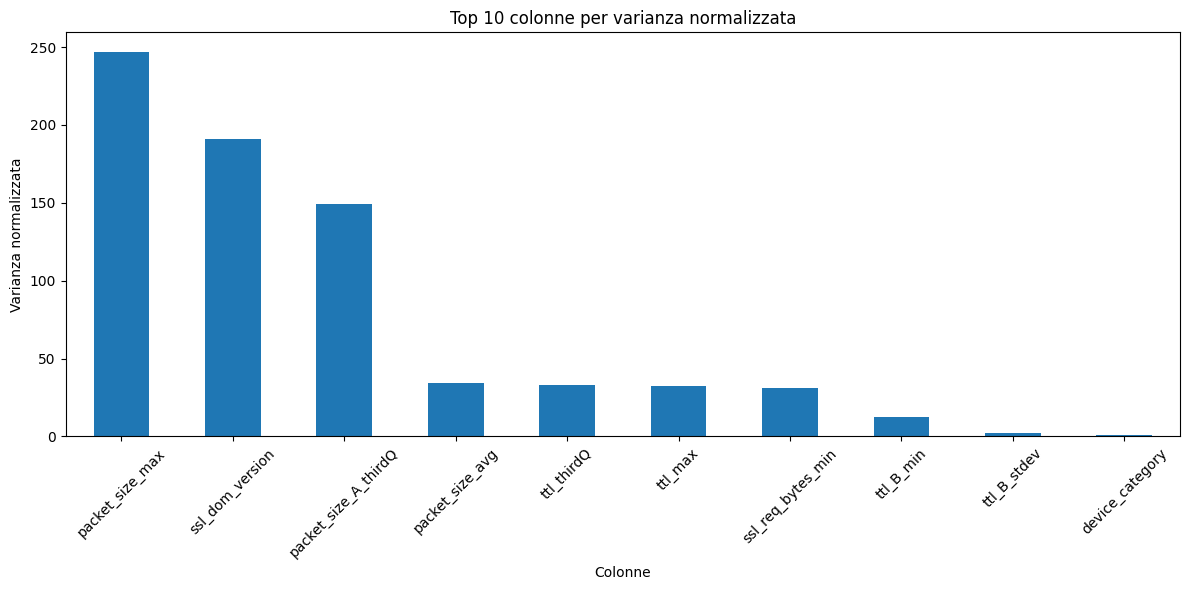

In [14]:
import matplotlib.pyplot as plt

# Visualizza le top 10 colonne con un grafico a barre
plt.figure(figsize=(12, 6))
varianza_ordinata.head(10).plot(kind='bar')
plt.title('Top 10 colonne per varianza normalizzata')
plt.ylabel('Varianza normalizzata')
plt.xlabel('Colonne')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
df_top_10["device_category"] = df['device_category']
cleaned_df = df_top_10

C:\Users\luigi\AppData\Local\Temp\ipykernel_125852\136956294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10["device_category"] = df['device_category']


In [16]:
cleaned_df

,packet_size_max,ssl_dom_version,packet_size_A_thirdQ,packet_size_avg,ttl_thirdQ,ttl_max,ssl_req_bytes_min,ttl_B_min,ttl_B_stdev,device_category
0,1400,769,85.50,300.487805,225.0,225,32,33,45.201365,0
1,1400,769,85.50,300.487805,226.0,226,32,33,45.437057,0
2,1400,769,85.50,302.048780,228.0,228,32,35,45.463948,0
3,1400,769,85.50,302.048780,228.0,228,32,34,45.699645,0
4,1400,769,85.50,279.636364,227.0,227,32,34,42.095300,0
...,...,...,...,...,...,...,...,...,...,...
895,1388,771,0.00,734.094340,64.0,64,985,52,0.197893,8
896,1388,771,23.25,230.269231,64.0,64,1057,53,0.522233,8
897,1388,771,69.50,255.863636,64.0,64,785,51,0.452267,8
898,1388,771,0.00,185.806452,64.0,64,760,52,0.500000,8


In [18]:
from sklearn.model_selection import train_test_split

# Dividi il dataframe in set di addestramento e test con stratificazione
X = cleaned_df.drop(columns=['device_category'])
y = cleaned_df['device_category']

# Utilizza train_test_split con stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Visualizza le dimensioni dei set di addestramento e test
print(f"Dimensioni del set di addestramento: {X_train.shape}")
print(f"Dimensioni del set di test: {X_test.shape}")

Dimensioni del set di addestramento: (720, 9)
Dimensioni del set di test: (180, 9)


c:\Users\luigi\python\ML_Course_2025\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy (sklearn-multinomial): 0.7778
Precision (sklearn-multinomial): 0.7375
Recall (sklearn-multinomial): 0.7778
F1 Score (sklearn-multinomial): 0.7384


c:\Users\luigi\python\ML_Course_2025\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\luigi\python\ML_Course_2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

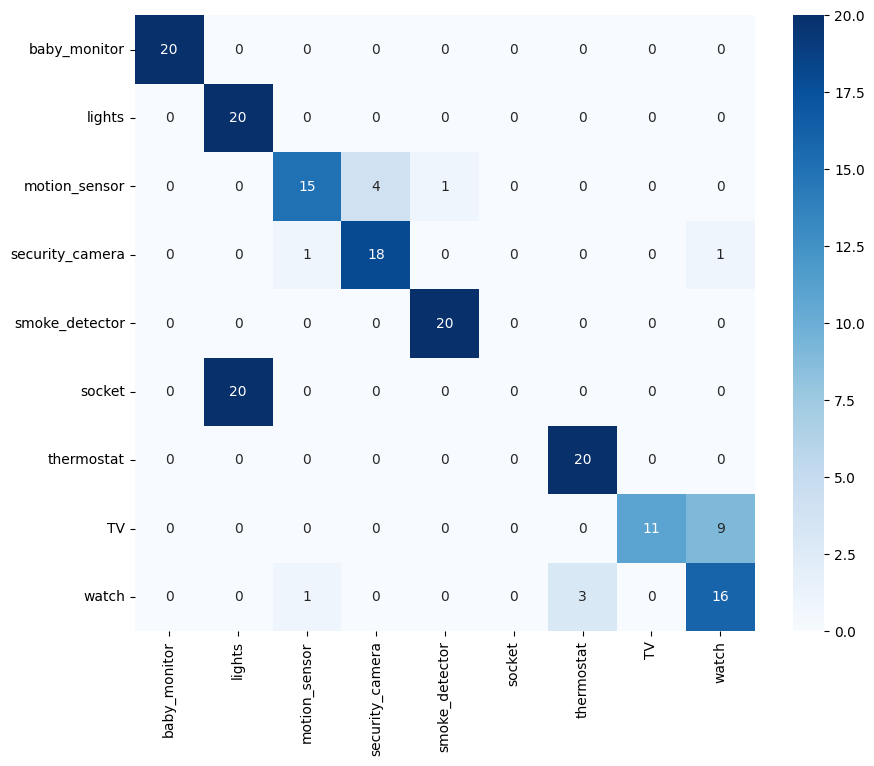

In [28]:
## Usiamo sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
logistic_model_sklearn = LogisticRegression(multi_class='multinomial', max_iter=10000)
logistic_model_sklearn.fit(X_train, y_train)
y_pred_multi = logistic_model_sklearn.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_multi)
precision_sklearn = precision_score(y_test, y_pred_multi, average='weighted')
recall_sklearn = recall_score(y_test, y_pred_multi, average='weighted')
f1_score_sklearn = f1_score(y_test, y_pred_multi, average='weighted')
print(f"Accuracy (sklearn-multinomial): {accuracy_sklearn:.4f}")
print(f"Precision (sklearn-multinomial): {precision_sklearn:.4f}")
print(f"Recall (sklearn-multinomial): {recall_sklearn:.4f}")
print(f"F1 Score (sklearn-multinomial): {f1_score_sklearn:.4f}")
# Calcolo della matrice di confusione
cm_sklearn = confusion_matrix(y_test, y_pred_multi)
# Visualizzazione della matrice di confusione
plt.figure(figsize=(10, 8))
sns.heatmap(cm_sklearn, annot=True, fmt='d', cmap='Blues', 
            xticklabels=devices, 
            yticklabels=devices)

### SKLEARN OVA

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Inizializza il modello OVA
lr_ova = LogisticRegression(multi_class='ovr', max_iter=1000)

# Addestra il modello
lr_ova.fit(X_train, y_train)

# Fai predizioni
y_pred_ova = lr_ova.predict(X_test)

# Calcola l'accuratezza
ova_accuracy = accuracy_score(y_test, y_pred_ova)
precision_OVA = precision_score(y_test, y_pred_ova, average='weighted')
recall_OVA = recall_score(y_test, y_pred_ova, average='weighted')
f1_OVA = f1_score(y_test, y_pred_ova, average='weighted')
# Stampa i risultati
print(f"Precision OVA: {precision_OVA:.4f}")
print(f"Recall OVA: {recall_OVA:.4f}")
print(f"F1 Score OVA: {f1_OVA:.4f}")


c:\Users\luigi\python\ML_Course_2025\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Precision OVA: 0.7357
Recall OVA: 0.7611
F1 Score OVA: 0.7206


c:\Users\luigi\python\ML_Course_2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


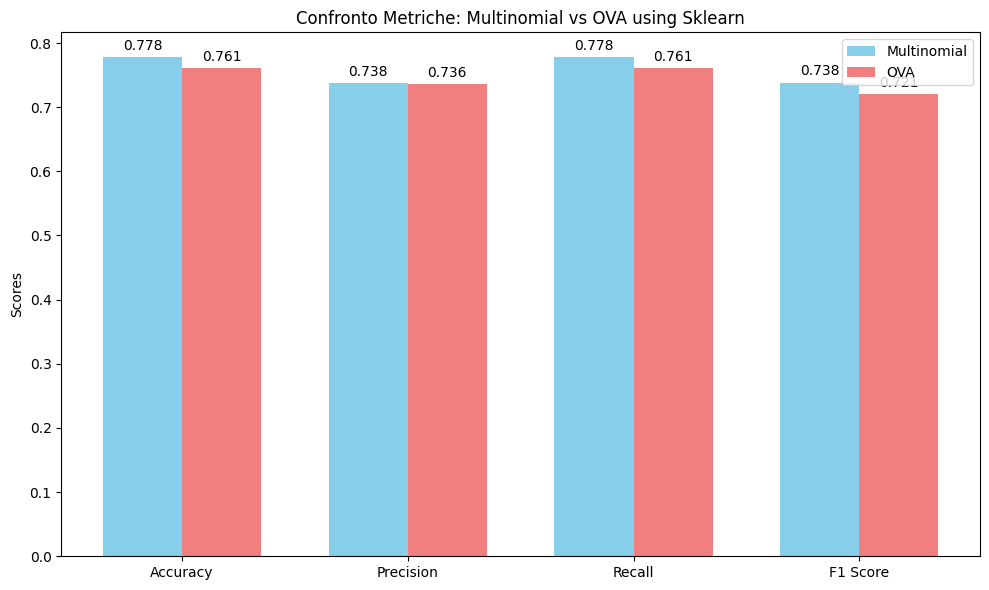

In [31]:
import numpy as np

import matplotlib.pyplot as plt

# Dati per il grafico
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
sklearn_values = [accuracy_sklearn, precision_sklearn, recall_sklearn, f1_score_sklearn]
ova_values = [ova_accuracy, precision_OVA, recall_OVA, f1_OVA]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, sklearn_values, width, label='Multinomial', color='skyblue')
rects2 = ax.bar(x + width/2, ova_values, width, label='OVA', color='lightcoral')

# Aggiungi testo sopra ogni barra
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Aggiungi etichette, titolo e legenda
ax.set_ylabel('Scores')
ax.set_title('Confronto Metriche: Multinomial vs OVA using Sklearn')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

# SOLUZIONE OVA - Implementando da zero l'algoritmo

In [32]:
class LogisticRegressionOVA:
    """
    Implementazione One-vs-All (OVA) per la regressione logistica multiclasse
    """
    
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        """
        Inizializzazione del modello
        
        Parametri:
        learning_rate: tasso di apprendimento per la discesa del gradiente
        n_iterations: numero di iterazioni per la discesa del gradiente
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.classifiers = []  # Lista di classificatori binari
        self.classes = None    # Classi uniche
    
    def fit(self, X, y):
        """
        Addestra un classificatore binario per ogni classe usando l'approccio OVA
        
        Parametri:
        X -- matrice delle feature di shape (m, n)
        y -- vettore delle etichette di shape (m,)
        """
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        
        print(f"Addestramento di {n_classes} classificatori OVA...")
        
        # Aggiungiamo una colonna di 1 per il termine di bias
        X_bias = np.c_[np.ones((X.shape[0], 1)), X]
        
        # Addestriamo un classificatore per ogni classe
        for i, c in enumerate(self.classes):
            print(f"\nClassificatore per classe {c} vs resto:")
            
            # Creiamo etichette binarie: 1 per la classe corrente, 0 per tutte le altre
            y_binary = np.where(y == c, 1, 0)
            
            # Creiamo e addestriamo il classificatore
            classifier = self._train_binary_classifier(X_bias, y_binary)
            self.classifiers.append(classifier)
            
            # Calcoliamo l'accuratezza sul training set
            y_pred = self._predict_binary(X_bias, classifier) >= 0.5
            accuracy = np.mean(y_pred == y_binary)
            print(f"Accuratezza per classe {c}: {accuracy:.4f}")
        
        print("\nAddestramento OVA completato!")
    
    def _train_binary_classifier(self, X, y):
        """
        Addestra un singolo classificatore binario
        
        Parametri:
        X -- matrice delle feature con bias di shape (m, n+1)
        y -- vettore delle etichette binarie di shape (m,)
        
        Restituisce:
        weights -- pesi ottimizzati del classificatore
        """
        m, n = X.shape
        weights = np.zeros(n)
        
        for i in range(self.n_iterations):
            # Calcolo della previsione
            z = np.dot(X, weights)
            h = self._sigmoid(z)
            
            # Calcolo del gradiente
            gradient = 1/m * np.dot(X.T, (h - y))
            
            # Aggiornamento dei pesi
            weights = weights - self.learning_rate * gradient
            
            # Stampa periodica del costo
            if (i % 200 == 0) or (i == self.n_iterations - 1):
                cost = self._compute_cost(X, y, weights)
                print(f"  Iterazione {i}: Costo = {cost:.6f}")
        
        return weights
    
    def _sigmoid(self, z):
        """
        Funzione sigmoide: trasforma un numero reale in una probabilità (0-1)
        """
        # Limitiamo z per evitare overflow/underflow numerici
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def _compute_cost(self, X, y, weights):
        """
        Calcola la funzione di costo (log loss)
        
        J(w) = -1/m * sum(y*log(h) + (1-y)*log(1-h))
        """
        m = X.shape[0]
        h = self._predict_binary(X, weights)
        
        # Per evitare log(0)
        epsilon = 1e-15
        h = np.clip(h, epsilon, 1 - epsilon)
        
        cost = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return cost
    
    def _predict_binary(self, X, weights):
        """
        Calcola la probabilità per un classificatore binario
        """
        z = np.dot(X, weights)
        return self._sigmoid(z)
    
    def predict_proba(self, X):
        """
        Calcola le probabilità per tutte le classi
        
        Parametri:
        X -- matrice delle feature di shape (m, n)
        
        Restituisce:
        probs -- matrice di probabilità di shape (m, n_classes)
        """
        # Aggiungiamo una colonna di 1 per il termine di bias
        X_bias = np.c_[np.ones((X.shape[0], 1)), X]
        
        n_samples = X.shape[0]
        n_classes = len(self.classes)
        probs = np.zeros((n_samples, n_classes))
        
        # Calcoliamo le probabilità per ogni classe
        for i, classifier in enumerate(self.classifiers):
            probs[:, i] = self._predict_binary(X_bias, classifier)
        
        # Normalizziamo le probabilità per avere somma 1
        probs = probs / np.sum(probs, axis=1, keepdims=True)
        
        return probs
    
    def predict(self, X):
        """
        Predice la classe con la probabilità più alta
        
        Parametri:
        X -- matrice delle feature di shape (m, n)
        
        Restituisce:
        y_pred -- vettore delle classi predette di shape (m,)
        """
        probs = self.predict_proba(X)
        return self.classes[np.argmax(probs, axis=1)]

In [33]:
from sklearn.model_selection import train_test_split

# Dividi il dataframe in set di addestramento e test con stratificazione
X = cleaned_df.drop(columns=['device_category'])
y = cleaned_df['device_category']

# Utilizza train_test_split con stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Visualizza le dimensioni dei set di addestramento e test
print(f"Dimensioni del set di addestramento: {X_train.shape}")
print(f"Dimensioni del set di test: {X_test.shape}")

Dimensioni del set di addestramento: (720, 9)
Dimensioni del set di test: (180, 9)


In [34]:
y_train.reset_index(drop=True, inplace=True)

In [35]:
# Istanziazione del modello
logistic_model = LogisticRegressionOVA(learning_rate=0.01, n_iterations=10000)
# Addestramento del modello
logistic_model.fit(X_train, y_train)


Addestramento di 9 classificatori OVA...

Classificatore per classe 0 vs resto:
  Iterazione 0: Costo = 3.837642
  Iterazione 200: Costo = 0.615718
  Iterazione 400: Costo = 0.558485
  Iterazione 600: Costo = 0.553418
  Iterazione 800: Costo = 0.540434
  Iterazione 1000: Costo = 0.558386
  Iterazione 1200: Costo = 0.552977
  Iterazione 1400: Costo = 0.543765
  Iterazione 1600: Costo = 0.533325
  Iterazione 1800: Costo = 0.554724
  Iterazione 2000: Costo = 0.588154
  Iterazione 2200: Costo = 0.598790
  Iterazione 2400: Costo = 0.548659
  Iterazione 2600: Costo = 0.564875
  Iterazione 2800: Costo = 0.835573
  Iterazione 3000: Costo = 0.547197
  Iterazione 3200: Costo = 0.575648
  Iterazione 3400: Costo = 0.550119
  Iterazione 3600: Costo = 0.559018
  Iterazione 3800: Costo = 0.575683
  Iterazione 4000: Costo = 0.575648
  Iterazione 4200: Costo = 0.623620
  Iterazione 4400: Costo = 0.575648
  Iterazione 4600: Costo = 0.532532
  Iterazione 4800: Costo = 0.575671
  Iterazione 5000: Costo = 

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Predizione sui dati di test
y_pred = logistic_model.predict(X_test)
# Calcolo dell'accuratezza
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy sul test set: {accuracy:.4f}")

Accuracy sul test set: 0.3556


In [39]:
from sklearn.preprocessing import MinMaxScaler
# Inizializza lo scaler MinMaxScaler
scaler = MinMaxScaler()
# Adatta lo scaler ai dati di training e trasforma sia il training set che il test set
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Converti gli array NumPy in DataFrame di pandas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [55]:
# Istanziazione del modello
logistic_model_scaled = LogisticRegressionOVA(learning_rate=0.01, n_iterations=10000)

# Addestramento del modello sui dati scalati
logistic_model_scaled.fit(X_train_scaled, y_train)

Addestramento di 9 classificatori OVA...

Classificatore per classe 0 vs resto:
  Iterazione 0: Costo = 0.690248
  Iterazione 200: Costo = 0.447534
  Iterazione 400: Costo = 0.400284
  Iterazione 600: Costo = 0.382066
  Iterazione 800: Costo = 0.370880
  Iterazione 1000: Costo = 0.362036
  Iterazione 1200: Costo = 0.354231
  Iterazione 1400: Costo = 0.347040
  Iterazione 1600: Costo = 0.340301
  Iterazione 1800: Costo = 0.333940
  Iterazione 2000: Costo = 0.327915
  Iterazione 2200: Costo = 0.322196
  Iterazione 2400: Costo = 0.316762
  Iterazione 2600: Costo = 0.311593
  Iterazione 2800: Costo = 0.306671
  Iterazione 3000: Costo = 0.301981
  Iterazione 3200: Costo = 0.297510
  Iterazione 3400: Costo = 0.293243
  Iterazione 3600: Costo = 0.289170
  Iterazione 3800: Costo = 0.285280
  Iterazione 4000: Costo = 0.281561
  Iterazione 4200: Costo = 0.278005
  Iterazione 4400: Costo = 0.274602
  Iterazione 4600: Costo = 0.271345
  Iterazione 4800: Costo = 0.268225
  Iterazione 5000: Costo = 

In [57]:
# Predizione sui dati di test scalati
y_pred_scaled = logistic_model_scaled.predict(X_test_scaled)

# Calcolo dell'accuratezza
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy sul test set scalato: {accuracy_scaled:.4f}")

Accuracy sul test set scalato: 0.6167
